In [14]:
%pip install pytorch_tabnet
!pip install tensorflow
%pip install optuna
!pip install --upgrade tensorflow
!pip install scikeras


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 18.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.1/12.1 MB 51.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 311.2/311.2 kB 29.5 MB/s eta 0:00:00
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.2.2
    Uninstalling scikit-learn-1.2.2:
      Successfully uninstalled scikit-learn-1.2.2
  Attempting uninstall: keras
    Found existing installation: keras 2.15.0
    Uninstalling keras-2.15.0:
      Successfully uninstalled keras-2.15.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow 2.15.0 requires keras<2.16,>=2.15.0, but you have keras 3.3.3 which is incompatible.


In [1]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.utils.class_weight import compute_class_weight
import numpy as np
from sklearn.preprocessing import MinMaxScaler

def data_preprocess(df):
    # One-hot encoding for the 'cancer_type' target variable
    y = pd.get_dummies(df['cancer_type'], prefix='cancer_type')
    df = df.drop('cancer_type', axis=1)

    # Assume all other categorical data has been appropriately handled and included in df

    # Scaling numeric columns
    numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns
    scaler = MinMaxScaler()
    df[numeric_cols] = scaler.fit_transform(df[numeric_cols])

    # Convert the one-hot encoded y DataFrame to a single column with integer labels
    y = np.argmax(y.values, axis=1)

    return df, y

# Load data
df = pd.read_csv('dataset.csv')

# Preprocess data
X, y = data_preprocess(df)

# Calculate class weights (for one-dimensional integer-encoded y)
class_weights = compute_class_weight(class_weight='balanced', classes=np.unique(y), y=y)
class_weights_dict = dict(enumerate(class_weights))

# Splitting data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print("Class weights:", class_weights_dict)


Class weights: {0: 0.30793060718711274, 1: 3.358108108108108, 2: 22.59090909090909, 3: 2.4362745098039214}


In [2]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.regularizers import l2
import numpy as np  # Make sure to import numpy

# Assuming you have your training data loaded into X_train and y_train
# Number of unique classes
num_classes = len(np.unique(y_train))   # Adjusted to find the number of unique classes directly

model = Sequential([
    Dense(32, activation='relu', kernel_regularizer=l2(0.02), input_shape=(X_train.shape[1],)),
    Dropout(0.13),
    Dense(32, activation='relu', kernel_regularizer=l2(0.02)),
    Dropout(0.13),
    Dense(num_classes, activation='softmax', kernel_regularizer=l2(0.02))
])

# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',  # Make sure this matches your label format
              metrics=['accuracy'])

# Print model summary to check the architecture
model.summary()


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 32)                  │          22,144 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 4)                   │             132 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 23,332 (91.14 KB)

 Trainable params: 23,332 (91.14 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 5s 19ms/step - accuracy: 0.3409 - loss: 3.0098 - val_accuracy: 0.0031 - val_loss: 2.6882
Epoch 2/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.1909 - loss: 2.2797 - val_accuracy: 0.0063 - val_loss: 2.2206
Epoch 3/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.2326 - loss: 2.1028 - val_accuracy: 0.1226 - val_loss: 1.9246
Epoch 4/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.3352 - loss: 1.8569 - val_accuracy: 0.0472 - val_loss: 1.7941
Epoch 5/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.1330 - loss: 1.8836 - val_accuracy: 0.5786 - val_loss: 1.6180
Epoch 6/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.4170 - loss: 1.6972 - val_accuracy: 0.6415 - val_loss: 1.5429
Epoch 7/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.5086 - loss: 1.5392 - val_accuracy: 0.2610 - val_loss: 1.6193
Epoch 8/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.4745 - loss: 1.4327 - val_accuracy: 0.3868 - val_los

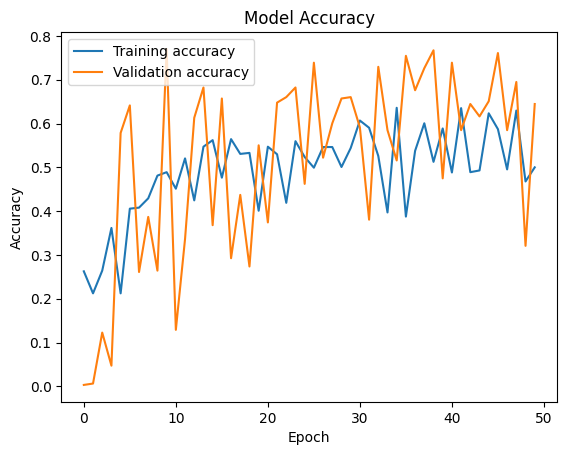

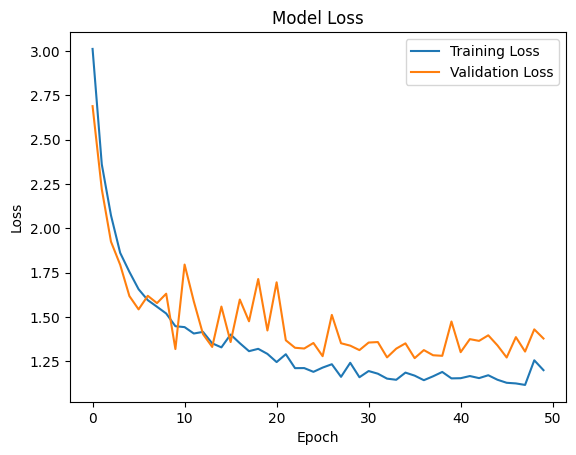

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# Check for any remaining NaN values in the dataset and convert them
if np.any(np.isnan(X_train)) or np.any(np.isnan(y_train)):
    X_train = np.nan_to_num(X_train, nan=0.0, dtype=np.float32)
    y_train = np.nan_to_num(y_train, nan=0.0, dtype=np.float32)

# Ensure data type is float32 for TensorFlow compatibility
X_train = X_train.astype(np.float32)
y_train = y_train.astype(np.float32)

# Fitting the model
history = model.fit(
    X_train, y_train,
    epochs=50,
    batch_size=32,
    validation_split=0.2,
    class_weight=class_weights_dict,
    verbose=1
)

# Plot accuracy
plt.plot(history.history['accuracy'], label='Training accuracy')
plt.plot(history.history['val_accuracy'], label='Validation accuracy')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(loc='upper left')
plt.show()

# Plot loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(loc='upper right')
plt.show()


13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7199 - loss: 1.3582  
Test Accuracy: 71.61%
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step


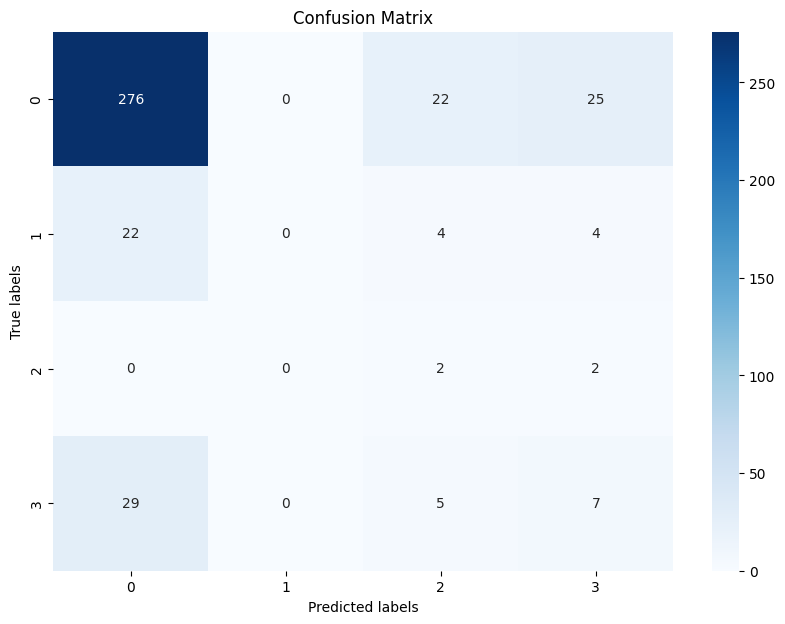

Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.85      0.85       323
           1       0.00      0.00      0.00        30
           2       0.06      0.50      0.11         4
           3       0.18      0.17      0.18        41

    accuracy                           0.72       398
   macro avg       0.27      0.38      0.28       398
weighted avg       0.70      0.72      0.71       398



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [4]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report

# Ensure that X_test and y_test are of the correct data type
X_test = X_test.astype(np.float32)
if y_test.dtype != np.int32 and y_test.dtype != np.int64:
    y_test = y_test.astype(np.int64)

# Evaluate the model
try:
    test_loss, test_acc = model.evaluate(X_test, y_test, verbose=1)
    print(f"Test Accuracy: {test_acc * 100:.2f}%")

    # Predict the test set results
    y_pred = model.predict(X_test)
    y_pred_classes = np.argmax(y_pred, axis=1)

    # Generate the confusion matrix
    cm = confusion_matrix(y_test, y_pred_classes)
    plt.figure(figsize=(10, 7))
    sns.heatmap(cm, annot=True, fmt='g', cmap='Blues')
    plt.xlabel('Predicted labels')
    plt.ylabel('True labels')
    plt.title('Confusion Matrix')
    plt.show()

    # Print classification report
    print("Classification Report:\n", classification_report(y_test, y_pred_classes))

except ValueError as e:
    print("ValueError during model evaluation:", e)


In [12]:
import numpy as np
import optuna
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Input
from tensorflow.keras.optimizers import Adam, SGD
from tensorflow.keras.callbacks import EarlyStopping

def create_model(trial):
    # Hyperparameters to tune
    optimizer_options = ['adam', 'sgd']
    dropout_rate = trial.suggest_float('dropout_rate', 0.1, 0.5)
    neurons = trial.suggest_categorical('neurons', [32, 64, 128])
    lr = trial.suggest_float('learning_rate', 1e-5, 1e-1, log=True)

    # Model definition using an Input layer
    model = Sequential([
        Input(shape=(X_train.shape[1],)),
        Dense(neurons, activation='relu'),
        Dropout(dropout_rate),
        Dense(neurons, activation='relu'),
        Dropout(dropout_rate),
        Dense(num_classes, activation='softmax')
    ])

    # Compile model with dynamic optimizer
    optimizer = trial.suggest_categorical('optimizer', optimizer_options)
    if optimizer == 'adam':
        opt = Adam(learning_rate=lr)
    elif optimizer == 'sgd':
        opt = SGD(learning_rate=lr)

    model.compile(optimizer=opt, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

    return model

def objective(trial):
    model = create_model(trial)
    early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

    model.fit(
        X_train, y_train,
        epochs=100,
        batch_size=trial.suggest_categorical('batch_size', [32, 64, 128]),
        verbose=0,
        validation_split=0.1,
        callbacks=[early_stopping]
    )

    loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
    return accuracy

# Assuming X_train, X_test, y_train, y_test, num_classes are pre-defined

# Create a study object
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=100)

# Output the best trial
print("Best trial:")
trial = study.best_trial
print("  Value: ", trial.value)
print("  Params: ")
for key, value in trial.params.items():
    print("    {}: {}".format(key, value))


[I 2024-05-06 10:26:40,123] A new study created in memory with name: no-name-25a5ea18-add3-4dce-8a96-d264740e6cef
[I 2024-05-06 10:27:22,283] Trial 0 finished with value: 0.8115577697753906 and parameters: {'dropout_rate': 0.4036236710507789, 'neurons': 64, 'learning_rate': 0.002656326000354726, 'optimizer': 'sgd', 'batch_size': 64}. Best is trial 0 with value: 0.8115577697753906.
[I 2024-05-06 10:27:28,270] Trial 1 finished with value: 0.8115577697753906 and parameters: {'dropout_rate': 0.26389511906462493, 'neurons': 64, 'learning_rate': 0.06083220306827813, 'optimizer': 'sgd', 'batch_size': 32}. Best is trial 0 with value: 0.8115577697753906.
[I 2024-05-06 10:27:42,727] Trial 2 finished with value: 0.8115577697753906 and parameters: {'dropout_rate': 0.23262211804209154, 'neurons': 128, 'learning_rate': 2.755797651908086e-05, 'optimizer': 'adam', 'batch_size': 32}. Best is trial 0 with value: 0.8115577697753906.
[I 2024-05-06 10:28:06,129] Trial 3 finished with value: 0.8115577697753

Best trial:
  Value:  0.8115577697753906
  Params: 
    dropout_rate: 0.4036236710507789
    neurons: 64
    learning_rate: 0.002656326000354726
    optimizer: sgd
    batch_size: 64


In [6]:
import numpy as np
from sklearn.model_selection import KFold, cross_val_score
from sklearn.metrics import accuracy_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Input
from tensorflow.keras.regularizers import l2

from scikeras.wrappers import KerasClassifier

# Function to create the model, required for KerasClassifier
def create_model():
    model = Sequential([
        Input(shape=(X_train.shape[1],)),  # Using Input to specify input shape
        Dense(32, activation='relu', kernel_regularizer=l2(0.02)),
        Dropout(0.13),
        Dense(32, activation='relu', kernel_regularizer=l2(0.02)),
        Dropout(0.13),
        Dense(len(np.unique(y_train)), activation='softmax', kernel_regularizer=l2(0.02))
    ])
    model.compile(optimizer='sgd', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return model

# Wrap the model with KerasClassifier
model = KerasClassifier(model=create_model, epochs=100, batch_size=32, verbose=0)

# Train the model
model.fit(X_train, y_train)

# Evaluate the model on the test set to report its accuracy
y_pred = model.predict(X_test)
NN_score = accuracy_score(y_test, y_pred)
print('Accuracy score of my best Neural Network: ', NN_score)


Accuracy score of my best Neural Network:  0.8115577889447236
